This notebook have the goal to classify the Eletric Faults

> This project was sugered by professor PhD. Kleber Melo e Silva of Universidade de Brasília

# 1 - Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
pip install gdown

Note: you may need to restart the kernel to use updated packages.


# 2 - Pre processing

In [3]:
# #download data csv
# def download(id):
#   url = 'https://drive.google.com/uc?id=' + str(id)
#   gdown.download(url, output = None, quiet = False)


# download('')

In [4]:
detect_df = pd.read_csv('classData.csv')
classif_df = pd.read_csv('detect_dataset.csv')


In [5]:
detect_df.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983


In [6]:
classif_df.head()


,Output (S),Ia,Ib,Ic,Va,Vb,Vc,Unnamed: 7,Unnamed: 8
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431,NaN,NaN
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202,NaN,NaN
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251,NaN,NaN
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963,NaN,NaN
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050,NaN,NaN


In [7]:
print("Columns of Detection DataSet:")
print(detect_df.columns, "\n")

print("Types of Detection DataSet:")
print(detect_df.dtypes, "\n")

print("Valeus NaN of Detection DataSet:")
print(detect_df.isna().sum())

Columns of Detection DataSet:
Index(['G', 'C', 'B', 'A', 'Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc'], dtype='object') 

Types of Detection DataSet:
G       int64
C       int64
B       int64
A       int64
Ia    float64
Ib    float64
Ic    float64
Va    float64
Vb    float64
Vc    float64
dtype: object 

Valeus NaN of Detection DataSet:
G     0
C     0
B     0
A     0
Ia    0
Ib    0
Ic    0
Va    0
Vb    0
Vc    0
dtype: int64


In [8]:
print("Extras information of detection DataSet:")
print(detect_df.describe(), "\n")

Extras information of detection DataSet:
                 G            C            B            A           Ia  \
count  7861.000000  7861.000000  7861.000000  7861.000000  7861.000000   
mean      0.432006     0.411271     0.555527     0.571429    13.721194   
std       0.495387     0.492095     0.496939     0.494903   464.741671   
min       0.000000     0.000000     0.000000     0.000000  -883.542316   
25%       0.000000     0.000000     0.000000     0.000000  -119.802518   
50%       0.000000     0.000000     1.000000     1.000000     2.042805   
75%       1.000000     1.000000     1.000000     1.000000   227.246377   
max       1.000000     1.000000     1.000000     1.000000   885.738571   

                Ib           Ic           Va           Vb           Vc  
count  7861.000000  7861.000000  7861.000000  7861.000000  7861.000000  
mean    -44.845268    34.392394    -0.007667     0.001152     0.006515  
std     439.269195   371.107412     0.289150     0.313437     0.307897  


This file contains the dataset to classify the types of fault.
Inputs - [Ia,Ib,Ic,Va,Vb,Vc]
Outputs - [G C B A]
Examples :
> [0 0 0 0] - No Fault

> [1 0 0 1] - LG fault (Between Phase A and Gnd)

> [0 0 1 1] - LL fault (Between Phase A and Phase B)

> [1 0 1 1] - LLG Fault (Between Phases A,B and ground)

> [0 1 1 1] - LLL Fault(Between all three phases)

> [1 1 1 1] - LLLG fault( Three phase symmetrical fault)


In [9]:
print("Columns of Classification DataSet:")
print(classif_df.columns, "\n")


Columns of Classification DataSet:
Index(['Output (S)', 'Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc', 'Unnamed: 7',
       'Unnamed: 8'],
      dtype='object') 



In [10]:
print(f"Shape of train dataset {detect_df.shape}")
print(f"Shape of test dataset {classif_df.shape}")


Shape of train dataset (7861, 10)
Shape of test dataset (12001, 9)


In [15]:
classif_df.head()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc,Unnamed: 7,Unnamed: 8
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431,NaN,NaN
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202,NaN,NaN
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251,NaN,NaN
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963,NaN,NaN
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050,NaN,NaN


Text(0.5, 1.0, 'Ground Fault')

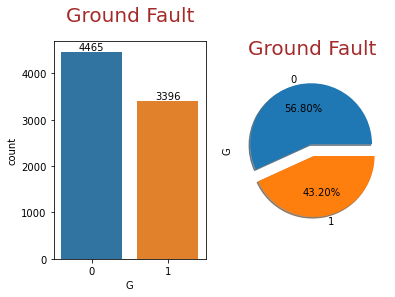

In [17]:
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='G', data=detect_df)
ax.bar_label(ax.containers[0])
plt.title("Ground Fault", fontsize=20,color = 'Brown',pad=20)

ax =plt.subplot(1,2,2)
ax=detect_df['G'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True)
ax.set_title(label = "Ground Fault", fontsize = 20,color='Brown',pad=20)

In [19]:
detect_df['Fault_Type'] = detect_df['G'].astype('str') + detect_df['C'].astype('str') + detect_df['B'].astype('str') + detect_df['A'].astype('str')
detect_df.head()


,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1001
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1001
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1001
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1001
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1001


In [22]:
detect_df['Fault_Type'][detect_df['Fault_Type'] == '0000' ] = 'NO Fault'
detect_df['Fault_Type'][detect_df['Fault_Type'] == '1001' ] = 'Line A to Ground Fault'
detect_df['Fault_Type'][detect_df['Fault_Type'] == '0110' ] = 'Line B to Line C Fault'
detect_df['Fault_Type'][detect_df['Fault_Type'] == '1011' ] = 'Line A Line B to Ground Fault'
detect_df['Fault_Type'][detect_df['Fault_Type'] == '0111' ] = 'Line A Line B Line C'
detect_df['Fault_Type'][detect_df['Fault_Type'] == '1111' ] = 'Line A Line B Line C to Ground Fault'
detect_df.head()

C:\Users\lucas\AppData\Local\Temp\ipykernel_10952\2517190964.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detect_df['Fault_Type'][detect_df['Fault_Type'] == '0000' ] = 'NO Fault'
C:\Users\lucas\AppData\Local\Temp\ipykernel_10952\2517190964.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detect_df['Fault_Type'][detect_df['Fault_Type'] == '1001' ] = 'Line A to Ground Fault'
C:\Users\lucas\AppData\Local\Temp\ipykernel_10952\2517190964.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,Line A to Ground Fault
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,Line A to Ground Fault
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,Line A to Ground Fault
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,Line A to Ground Fault
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,Line A to Ground Fault


(-1.25, 1.25, -1.25, 1.25)

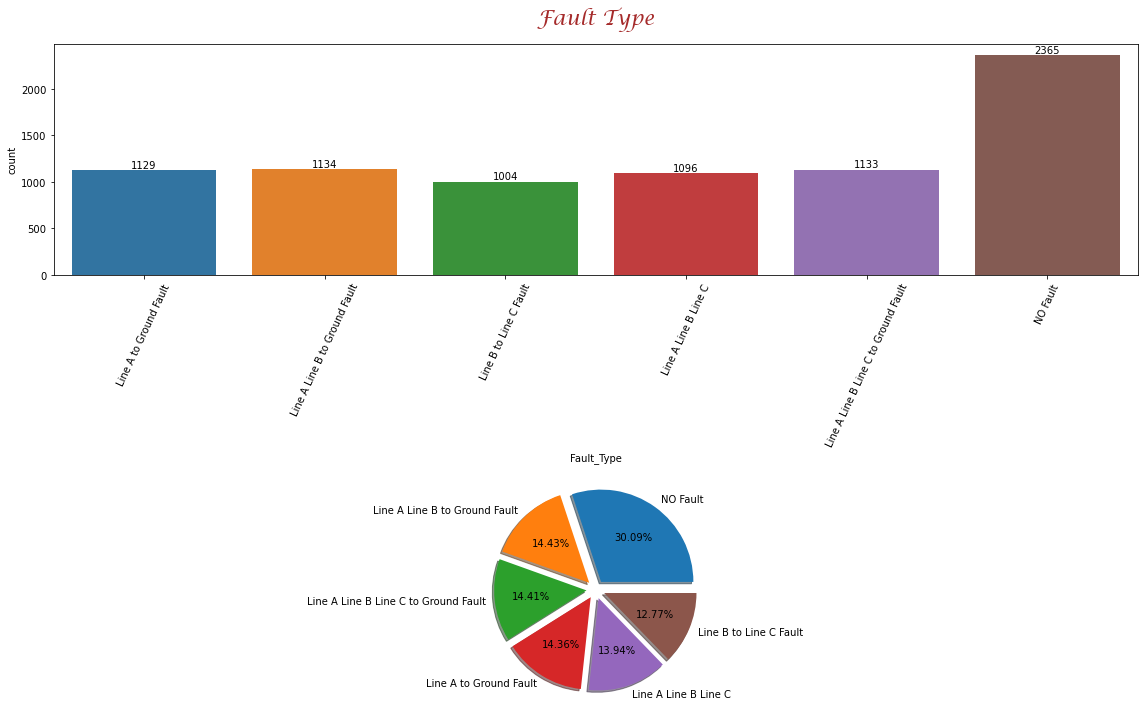

In [27]:
ax = plt.figure(figsize = (16,10))
ax = plt.subplot(2,1,1)
ax = sns.countplot(x='Fault_Type', data=detect_df)
ax.bar_label(ax.containers[0])
plt.title("Fault Type", fontsize=20,color = 'Brown',font='Lucida Calligraphy',pad=20)
plt.xticks(rotation=65)
plt.tight_layout()

ax =plt.subplot(2,1,2)
ax=detect_df['Fault_Type'].value_counts().plot.pie(explode=[0.1, 0.1,0.1,0.1, 0.1,0.1],autopct='%1.2f%%',shadow=True)
plt.tight_layout()
plt.axis('off')


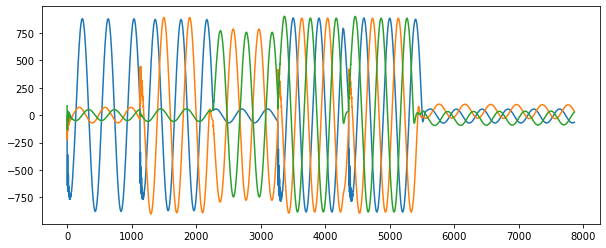

In [28]:
plt.figure(figsize = (10,4))
plt.plot(detect_df["Ia"])
plt.plot(detect_df["Ib"])
plt.plot(detect_df["Ic"]);

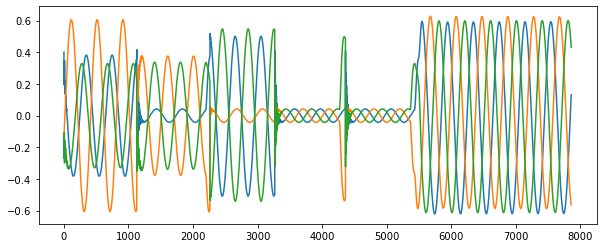

In [30]:
plt.figure(figsize = (10,4))
plt.plot(detect_df["Va"])
plt.plot(detect_df["Vb"])
plt.plot(detect_df["Vc"]);